# Подвиг 7

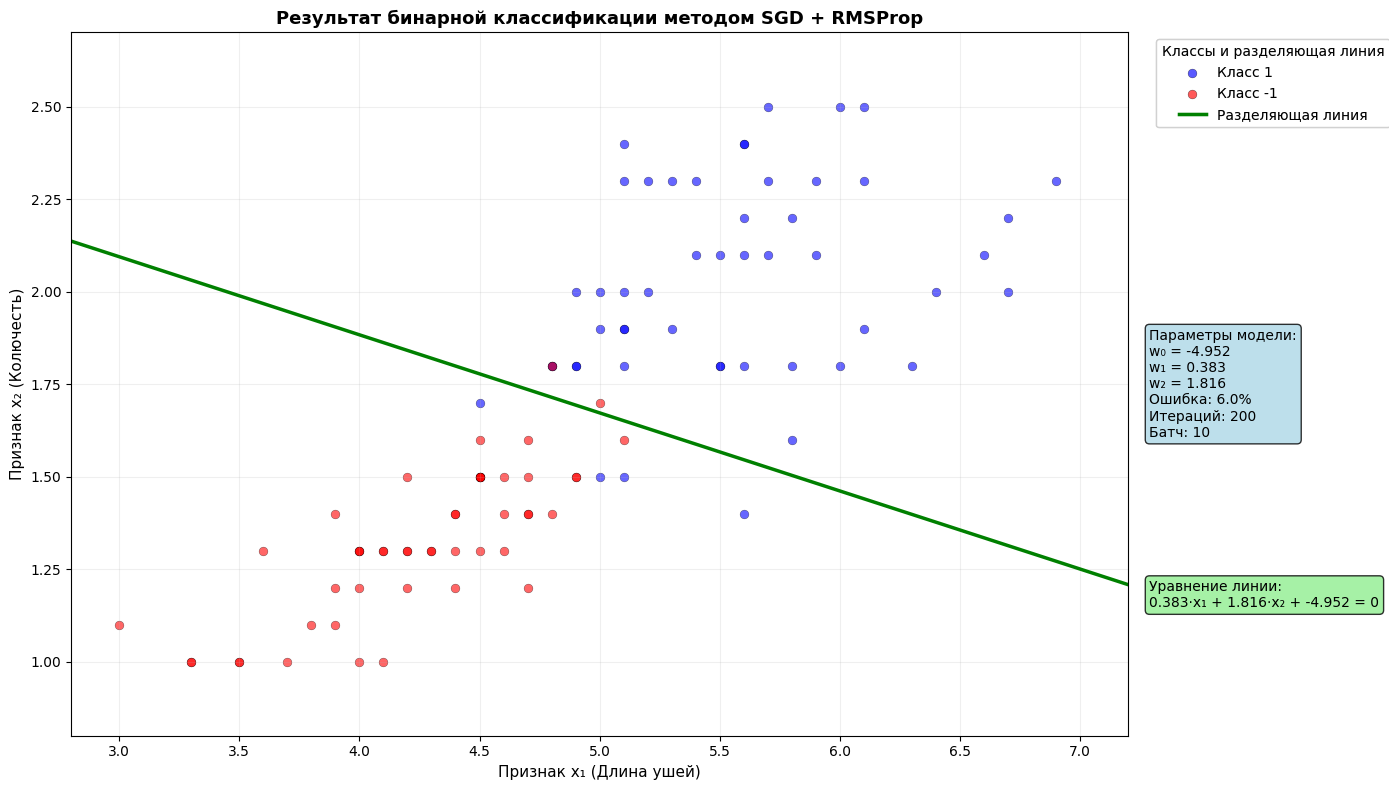

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ:
Вектор параметров w: (-4.952, 0.383, 1.816)
Уравнение разделяющей линии: 0.383·x₁ + 1.816·x₂ + -4.952 = 0
Точность классификации: 94.0%
Количество ошибок: 6 из 100


In [2]:
import numpy as np

# -----------------------------
# 1) Определяем функции ошибки
# -----------------------------

# логарифмическая функция потерь (log-loss)
def loss(w, x, y):
    M = np.dot(w, x) * y                # скалярное произведение весов и признаков, умноженное на метку
    return np.log2(1 + np.exp(-M))      # формула log-loss (в двоичном логарифме)

# градиент логарифмической функции потерь по w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))


# -----------------------------
# 2) Загружаем обучающие данные
# -----------------------------

# признаки (x1, x2) для объектов
data_x = [(5.3, 2.3), (5.7, 2.5), (4.0, 1.0), (5.6, 2.4), (4.5, 1.5), (5.4, 2.3), (4.8, 1.8), (4.5, 1.5), (5.1, 1.5), (6.1, 2.3), (5.1, 1.9), (4.0, 1.2), (5.2, 2.0), (3.9, 1.4), (4.2, 1.2), (4.7, 1.5), (4.8, 1.8), (3.6, 1.3), (4.6, 1.4), (4.5, 1.7), (3.0, 1.1), (4.3, 1.3), (4.5, 1.3), (5.5, 2.1), (3.5, 1.0), (5.6, 2.2), (4.2, 1.5), (5.8, 1.8), (5.5, 1.8), (5.7, 2.3), (6.4, 2.0), (5.0, 1.7), (6.7, 2.0), (4.0, 1.3), (4.4, 1.4), (4.5, 1.5), (5.6, 2.4), (5.8, 1.6), (4.6, 1.3), (4.1, 1.3), (5.1, 2.3), (5.2, 2.3), (5.6, 1.4), (5.1, 1.8), (4.9, 1.5), (6.7, 2.2), (4.4, 1.3), (3.9, 1.1), (6.3, 1.8), (6.0, 1.8), (4.5, 1.6), (6.6, 2.1), (4.1, 1.3), (4.5, 1.5), (6.1, 2.5), (4.1, 1.0), (4.4, 1.2), (5.4, 2.1), (5.0, 1.5), (5.0, 2.0), (4.9, 1.5), (5.9, 2.1), (4.3, 1.3), (4.0, 1.3), (4.9, 2.0), (4.9, 1.8), (4.0, 1.3), (5.5, 1.8), (3.7, 1.0), (6.9, 2.3), (5.7, 2.1), (5.3, 1.9), (4.4, 1.4), (5.6, 1.8), (3.3, 1.0), (4.8, 1.8), (6.0, 2.5), (5.9, 2.3), (4.9, 1.8), (3.3, 1.0), (3.9, 1.2), (5.6, 2.1), (5.8, 2.2), (3.8, 1.1), (3.5, 1.0), (4.5, 1.5), (5.1, 1.9), (4.7, 1.4), (5.1, 1.6), (5.1, 2.0), (4.8, 1.4), (5.0, 1.9), (5.1, 2.4), (4.6, 1.5), (6.1, 1.9), (4.7, 1.6), (4.7, 1.4), (4.7, 1.2), (4.2, 1.3), (4.2, 1.3)]
data_y = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

# добавляем признак "1" для свободного коэффициента w0
x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)                  # размер обучающей выборки


# -----------------------------
# 3) Гиперпараметры обучения
# -----------------------------

w = [0.0, 0.0, 0.0]                     # начальные веса (w0, w1, w2)
nt = np.array([0.1, 0.05, 0.05])        # скорость обучения для каждого параметра
lm = 0.01                               # λ — коэффициент сглаживания ошибки
N = 200                                 # число итераций обучения (SGD)
batch_size = 10                         # размер мини-батча (K = 10)

# RMSProp параметры
alpha = 0.7                             # коэффициент экспоненциального сглаживания для градиентов
G = np.zeros(len(w))                    # аккумулируем квадраты градиентов
eps = 0.01                              # "стабилизатор", чтобы не делить на 0


# -----------------------------
# 4) Начальные значения
# -----------------------------

# средний эмпирический риск по всем объектам
Qe = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])

np.random.seed(0)                       # фиксируем случайность (для воспроизводимости)


# -----------------------------
# 5) Обучение модели (SGD + RMSProp)
# -----------------------------

for i in range(N):
    # случайный стартовый индекс для мини-батча
    k = np.random.randint(0, n_train - batch_size - 1)
    
    total_df, total_loss = 0, 0         # накапливаем градиенты и потери внутри батча
    
    # проходим по батчу
    for j in range(k, k + batch_size):
        total_df += df(w, x_train[j], y_train[j])      # градиент по объекту
        total_loss += loss(w, x_train[j], y_train[j])  # ошибка по объекту
        
    grad = total_df / batch_size        # средний градиент по батчу
    Qk = total_loss / batch_size        # средняя ошибка по батчу
    
    # обновляем скользящее экспоненциальное среднее ошибки
    Qe = lm * Qk + (1 - lm) * Qe
    
    # обновляем накопленные квадраты градиентов (RMSProp)
    G = alpha * G + (1 - alpha) * (grad ** 2)
    
    # обновляем веса по правилу RMSProp
    w = w - nt * (grad / (np.sqrt(G) + eps))


# -----------------------------
# 6) Результат
# -----------------------------

w = tuple(w)                            # финальные веса
Q = np.mean(x_train @ w * y_train < 0)  # доля ошибок на обучающей выборке

import matplotlib.pyplot as plt
import numpy as np

# 6) Визуализация результатов
plt.figure(figsize=(14, 8))  # Увеличиваем ширину для двух легенд

# Разделяем данные по классам
class_1_x = [x[1] for i, x in enumerate(x_train) if y_train[i] == 1]
class_1_y = [x[2] for i, x in enumerate(x_train) if y_train[i] == 1]
class_minus1_x = [x[1] for i, x in enumerate(x_train) if y_train[i] == -1]
class_minus1_y = [x[2] for i, x in enumerate(x_train) if y_train[i] == -1]

# Рисуем точки данных с меньшим размером и прозрачностью
plt.scatter(class_1_x, class_1_y, c='blue', s=40, alpha=0.6, label='Класс 1', edgecolors='black', linewidth=0.3)
plt.scatter(class_minus1_x, class_minus1_y, c='red', s=40, alpha=0.6, label='Класс -1', edgecolors='black', linewidth=0.3)

# Рисуем разделяющую линию
x1_range = np.linspace(2.5, 7.5, 100)  # Уменьшаем диапазон для лучшего масштаба
x2_line = (-w[1] * x1_range - w[0]) / w[2]

plt.plot(x1_range, x2_line, 'green', linewidth=2.5, label='Разделяющая линия')

# Настраиваем оси для лучшего масштаба
plt.xlim(2.8, 7.2)  # Уменьшаем масштаб по x
plt.ylim(0.8, 2.7)   # Уменьшаем масштаб по y

# Настраиваем внешний вид
plt.xlabel('Признак x₁ (Длина ушей)', fontsize=11)
plt.ylabel('Признак x₂ (Колючесть)', fontsize=11)
plt.title('Результат бинарной классификации методом SGD + RMSProp', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.2)

# ПЕРВАЯ ЛЕГЕНДА: классы и линия
legend1 = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title="Классы и разделяющая линия")
plt.gca().add_artist(legend1)  # Добавляем первую легенду, чтобы не перезаписалась

# ВТОРАЯ ЛЕГЕНДА: параметры модели (в виде текста)
param_text = (
    f'Параметры модели:\n'
    f'w₀ = {w[0]:.3f}\n'
    f'w₁ = {w[1]:.3f}\n'
    f'w₂ = {w[2]:.3f}\n'
    f'Ошибка: {Q:.1%}\n'
    f'Итераций: {N}\n'
    f'Батч: {batch_size}'
)

# Создаем вторую легенду как текстовый блок
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
plt.text(1.02, 0.5, param_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='center', bbox=props)

# Третья информационная панель с уравнением
equation_text = f'Уравнение линии:\n{w[1]:.3f}·x₁ + {w[2]:.3f}·x₂ + {w[0]:.3f} = 0'
plt.text(1.02, 0.2, equation_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()

plt.show()

# Дополнительная информация в консоли
print("="*50)
print("РЕЗУЛЬТАТЫ ОБУЧЕНИЯ:")
print("="*50)
print(f"Вектор параметров w: ({w[0]:.3f}, {w[1]:.3f}, {w[2]:.3f})")
print(f"Уравнение разделяющей линии: {w[1]:.3f}·x₁ + {w[2]:.3f}·x₂ + {w[0]:.3f} = 0")
print(f"Точность классификации: {(1-Q):.1%}")
print(f"Количество ошибок: {int(Q * n_train)} из {n_train}")
print("="*50)